In [3]:
# import pytube library to downlaod the video
import pytube
import PySimpleGUI as sg 


# Set the theme for GUI
sg.theme('DarkRed1')

# Prompt user to enter countdown time
layout = [
            [sg.Text("Download YouTube video\n")],
# Ask for the url of video
            [sg.Text("Enter video url: "), sg.InputText()],
# Specify the file path for storage
            [sg.Text("Enter path of storage: "), sg.InputText()],
            [sg.Text("\n")],
            [sg.Button('Download'),sg.Button('Cancel')]
            
]

# Create the Window
window = sg.Window('Youtube Downloader', layout)

while True:
# Read user input
    event, values = window.read()
    url = values[0]
    path = values[1]
    

  

# Call Countdown() function if user clicks start button                       
    if event == 'Download':
# Magic line to download the video
        try:
            pytube.YouTube(url).streams.get_highest_resolution().download(path)
            sg.popup("YouTube video is now downloading...")

# This one should catch - pytube.exceptions.RegexMatchError:
# regex pattern ((?:v=|\/)([0-9A-Za-z_-]{11}).*) had zero matches
  
        except pytube.exceptions.RegexMatchError:
            sg.popup_error('The Regex pattern did not return any matches for the video: {}'.format(url))

        except pytube.exceptions.ExtractError:
            sg.popup_error('An extraction error occurred for the video: {}'.format(url))

        except pytube.exceptions.VideoUnavailable:
            sg.popup_error('The following video is unavailable: {}'.format(url))
            
# Break while loop if window is closed or user clicks cancel
    elif event == sg.WIN_CLOSED or event == 'Cancel':
        break
    else:
        sg.pop_error("Enter valid input")
        
# if user closes window or clicks cancel
    if event == sg.WIN_CLOSED or event == 'Cancel':
        break
        
# Close window   
window.close()  






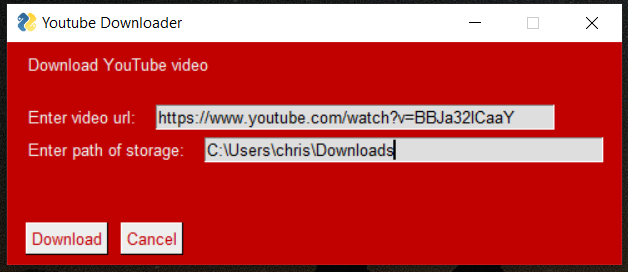

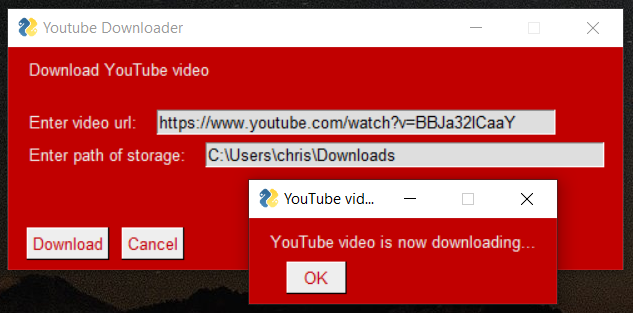

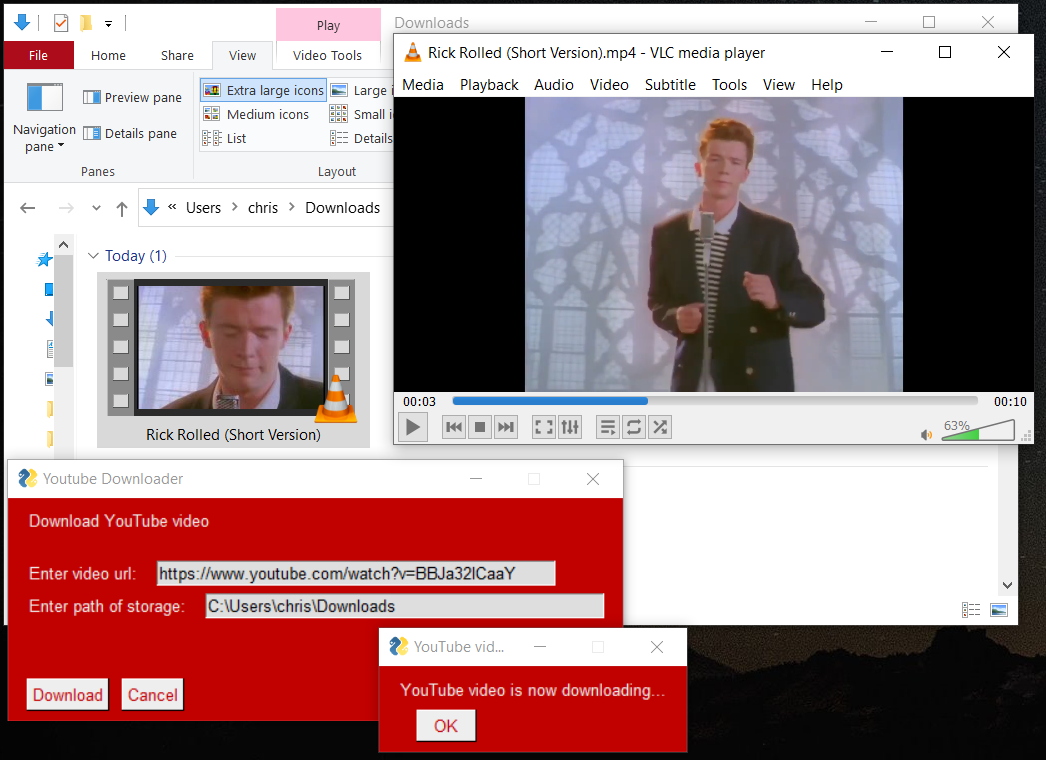